<a href="https://colab.research.google.com/github/Ghiscode/Pengolahan-Citra-Digital/blob/main/Segmentasi-Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("yolo11s-seg.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!yolo task=segment mode=train model=yolo11s-seg.pt data=coco8-seg.yaml epochs=30 imgsz=640

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8-seg.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving buah-basket.jpg to buah-basket.jpg
Saving jalan.jpg to jalan.jpg



0: 640x640 3 bowls, 6 apples, 3 oranges, 26.8ms
1: 640x640 19 persons, 2 handbags, 26.8ms
Speed: 4.9ms preprocess, 26.8ms inference, 17.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/segment/predict


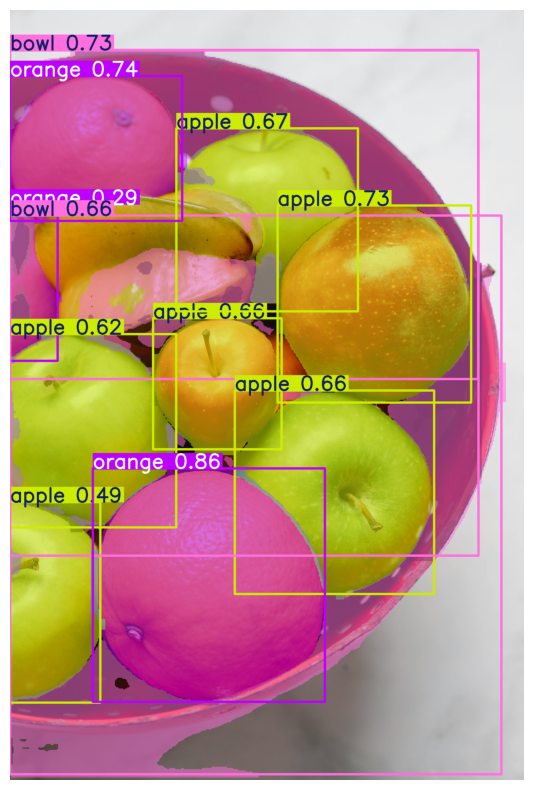

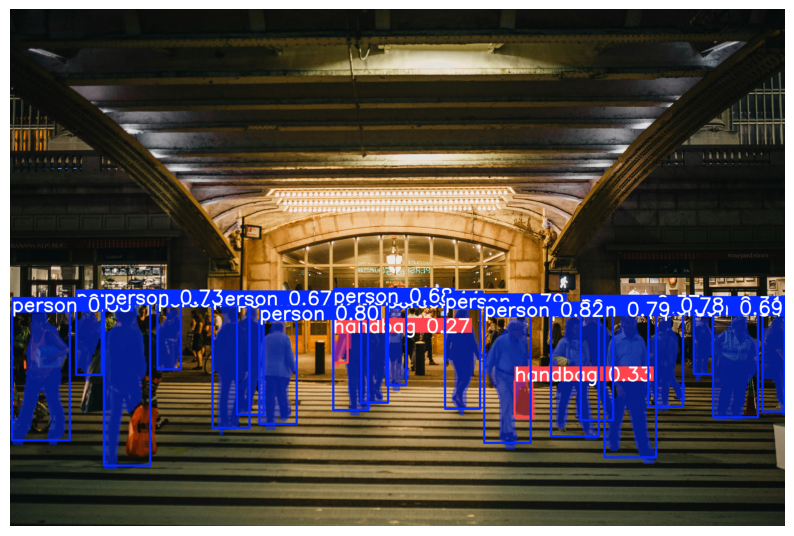

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# 1. Load Model
model = YOLO("yolov8n-seg.pt")

daftar_gambar = ["/content/buah-basket.jpg", "/content/jalan.jpg"]

# 3. Jalankan Prediksi
results = model.predict(source=daftar_gambar, save=True, task="segment")

# 4. Tampilkan Hasilnya
for result in results:
    im_array = result.plot()

    im_rgb = im_array[..., ::-1]

    # Tampilkan gambar menggunakan Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(im_rgb)
    plt.axis('off')
    plt.show()

**1. Mengapa Terdeksi**
Objek pada gambar terdeteksi, karena model YOLO telah melalui proses pelatihan dengan menggunakan dataset besar bernama COCO

**2. Mengapa Tidak Terdeteksi**
Ada detail kecil seperti orang yang dipojok yang tidak terdeteksi, itu terjadi karena tubuh mereka yang di pojok tertutup oleh orang di depannya sehingga model kesulitan untuk mengenali objek secara utuh